## Priority Zonation of Potetial Landslide by Monte Carlo Simulation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the Excel file that contains the probability change values
file_path = '/content/LandslideDynamics_v4.xls'  # File containing 2021-2018 change in probabilities
sheet_name = 'Probability'  # Update if necessary


In [ ]:
# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
# Check if the column "dynamics" exists and contains the data
if 'Dynamics' in df.columns:
    prob_diff = df['Dynamics'].values  # Extracting the probability change (2021 - 2018)
else:
    raise ValueError("The column 'dynamics' does not exist in the Excel file.")


In [ ]:
# Step 2: Define thresholds for immediate, long-term, and less priority
# These thresholds can be defined based on domain knowledge, or you can experiment with percentiles.
immediate_threshold = 0.15  # Immediate priority: high change
short_term_threshold = 0.05 # Short-term priority: moderate change
long_term_threshold = 0.01  # Long-term priority: low change

In [ ]:
import numpy as np

# Set a fixed random seed for reproducibility
np.random.seed(123)

In [ ]:
# Step 3: Monte Carlo simulation to generate a probabilistic model
n_simulations = 10000
monte_carlo_results = np.zeros((n_simulations, 1726))

for i in range(n_simulations):
    # For each simulation, perturb the probability change data by adding some random noise
    perturbed_prob_diff = prob_diff + np.random.normal(0, 0.1, 1726)  # Adding some noise
    monte_carlo_results[i, :] = perturbed_prob_diff


In [ ]:
# Step 4: Calculate the mean and confidence intervals for each slope unit's probability difference
mean_prob_diff = np.mean(monte_carlo_results, axis=0)
std_prob_diff = np.std(monte_carlo_results, axis=0)

In [ ]:
# Step 5: Categorize slope units based on mean probability difference
categories = []
for value in mean_prob_diff:
    if value >= immediate_threshold:
        categories.append('Immediate Priority')
    elif value >= short_term_threshold:
        categories.append('Short-Term Priority')
    elif value >= long_term_threshold:
        categories.append('Long-Term Priority')
    else:
        categories.append('No Immediate Concern')

# Step 6: Create a DataFrame with the results
slope_unit_ids = np.arange(1, 1727)
results_df = pd.DataFrame({
    'Slope Unit ID': slope_unit_ids,
    'Mean Probability Change': mean_prob_diff,
    'Standard Deviation': std_prob_diff,
    'Category': categories
})


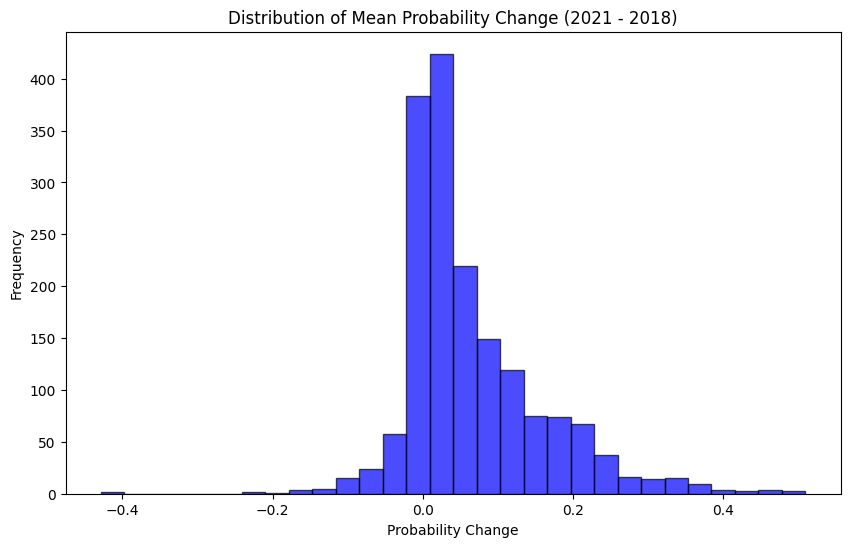

In [ ]:
#  Plot the distribution of the probability change
plt.figure(figsize=(10, 6))
plt.hist(mean_prob_diff, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Mean Probability Change (2021 - 2018)')
plt.xlabel('Probability Change')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Save results to a CSV file if needed
results_df.to_csv('slopeunit_priority_classification.csv', index=False)

In [ ]:
from google.colab import files

# Download the file
files.download('/content/slopeunit_priority_classification.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 7: Calculate residuals (difference between original prob_diff and mean simulated prob_diff)
residuals = prob_diff - mean_prob_diff

# Step 8: Calculate uncertainty (standard deviation of Monte Carlo results)
uncertainty = std_prob_diff


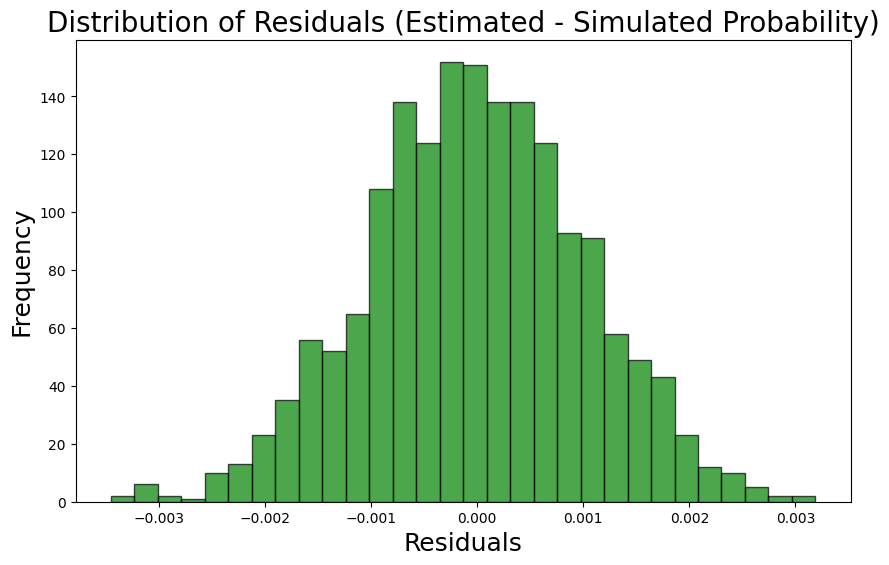

In [ ]:
import matplotlib.pyplot as plt

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals (Estimated - Simulated Probability)', fontsize=20)
plt.xlabel('Residuals', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()


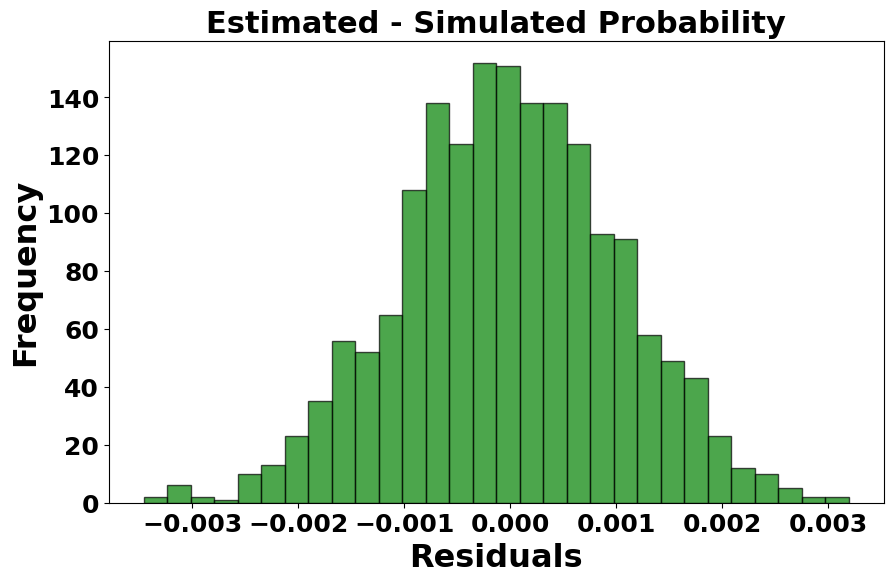

In [ ]:
import matplotlib.pyplot as plt

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Estimated - Simulated Probability', fontsize=22, fontweight='bold')
plt.xlabel('Residuals', fontsize=23, fontweight='bold')
plt.ylabel('Frequency', fontsize=23, fontweight='bold')

# Increase the number of ticks on the x-axis and y-axis
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# Customize tick intervals
plt.locator_params(axis='x', nbins=10)  # Increase x-axis numerical levels
plt.locator_params(axis='y', nbins=10)  # Increase y-axis numerical levels

plt.show()



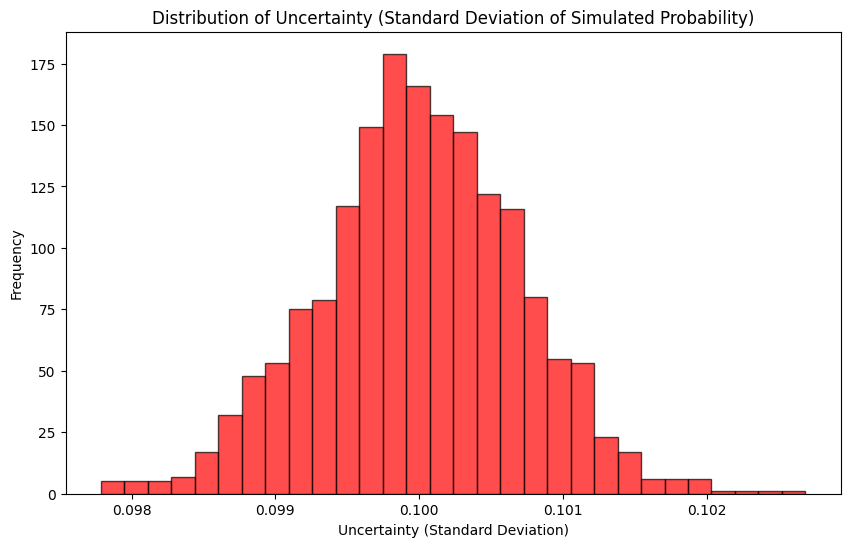

In [ ]:
# Plot the uncertainty (standard deviation of the simulations)
plt.figure(figsize=(10, 6))
plt.hist(uncertainty, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Uncertainty (Standard Deviation of Simulated Probability)')
plt.xlabel('Uncertainty (Standard Deviation)')
plt.ylabel('Frequency')
plt.show()


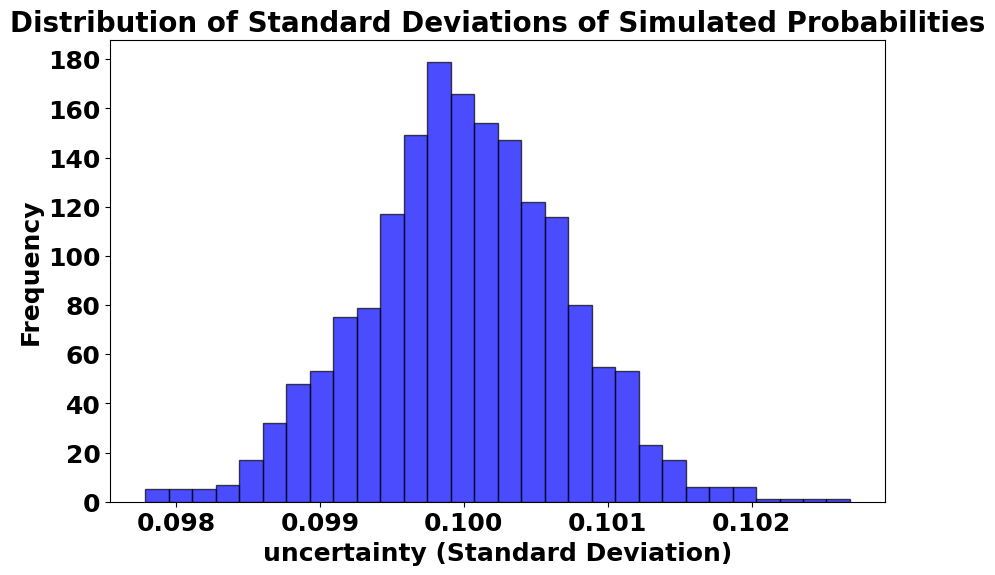

In [ ]:
# Plot standard deviation frequency
plt.figure(figsize=(10, 6))
plt.hist(std_prob_diff, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Standard Deviations of Simulated Probabilities', fontsize=20, fontweight='bold')
plt.xlabel('uncertainty (Standard Deviation)', fontsize=18, fontweight='bold')
plt.ylabel('Frequency', fontsize=18, fontweight='bold')

# Increase the number of ticks on the x-axis and y-axis for standard deviation plot
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.locator_params(axis='x', nbins=10)  # Increase x-axis numerical levels
plt.locator_params(axis='y', nbins=10)  # Increase y-axis numerical levels

plt.show()

Congratulations!!
